# Análisis Exploratorio de Datos

En este notebook vamos a centrarnos en la exploración de las distintas variables que tenemos para predecir nuestra variable objetivo (Frio KW) y en el análisis de esta última. Todo esto con el fin de intentar detectar de forma temprana las posibles características que tengan mayor influencia en la predicción.

## 1. Exploración superficial de los crudos (.xlsx)

En este primer pantallazo no resulta interesante conocer un poco sobre qué información presenta cada hoja del archivo.

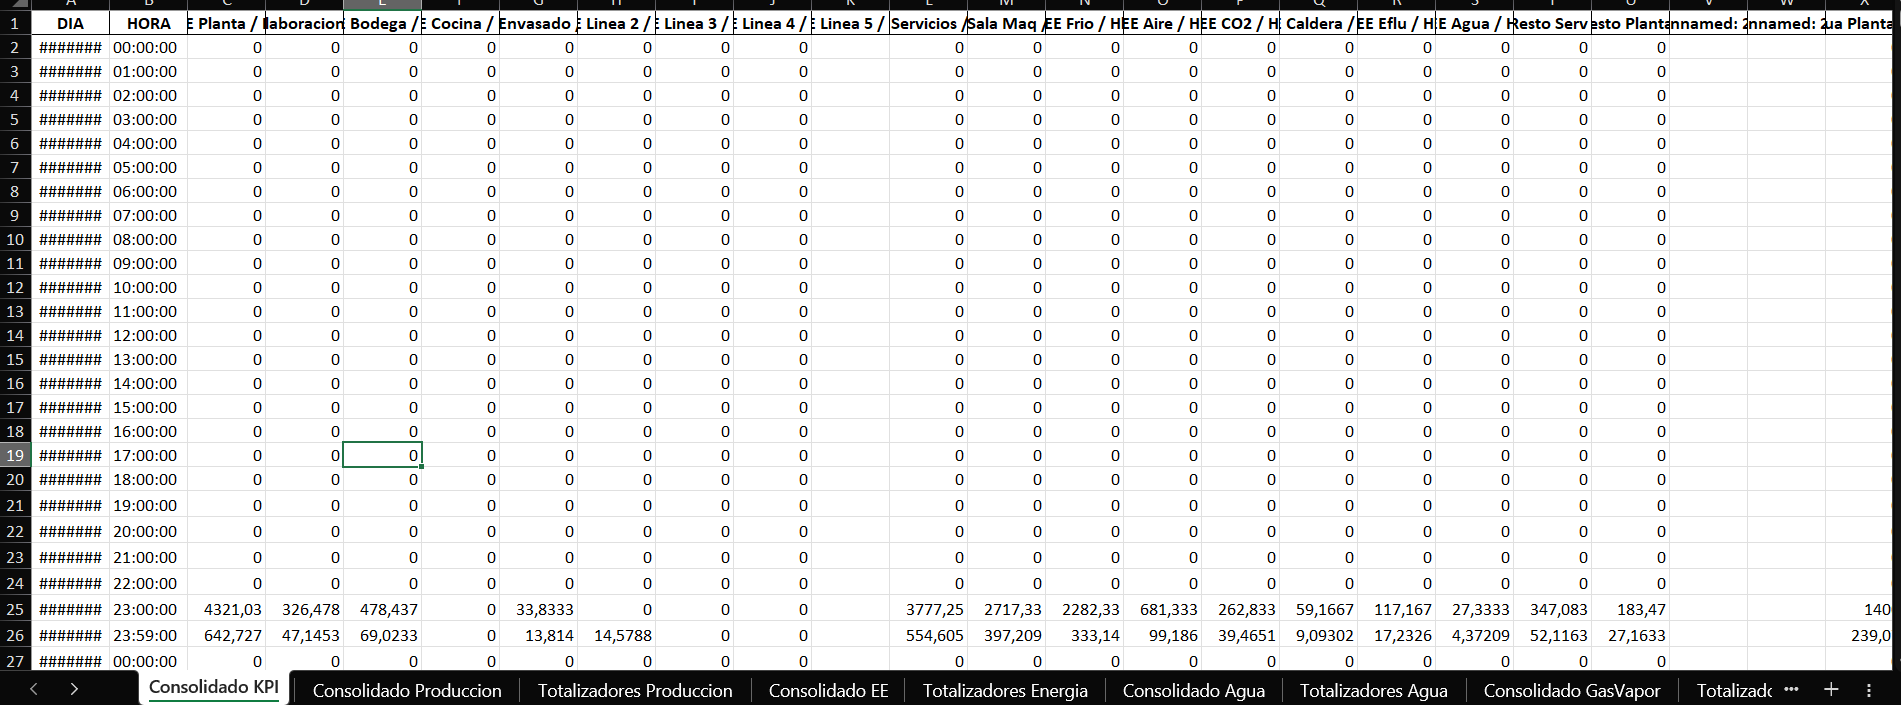

Mirando los nombres de las distintas hojas nos dimos cuenta que varias de ellas poseen 2 versiones:

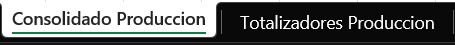

Lo que disparó la pregunta **¿Qué diferencia hay entre Consolidado y Totalizadores?**

Investigando un poco llegamos a la conclusión de que las hojas **Consolidado** son una especie de resumen filtrado y menos detallado de **Totalizadores**, esto normalmente se usa en las empresas para que gerentes o empleados que no están trabajando particularmente en la planta puedan ver los datos sin tanto ruido visual.

Esto ya nos lelvó a tomar una decisión. Siempre que sea posible (o sea, que exista) vamos a **usar la versión de Consolidado**.

Luego nos surgieron las típicas preguntas de: *"¿Qué significa esto? ¿Y esto otro?"*

Así que acá va un breve detalle de lo que significan algunas de las hojas:

- **KPI:** Son metricas de eficiencia creadas a partir de variables presentes en otras hojas.
- **Glicol:** Es el fluido refrigerante utilizado por el sistema de refrigeración.
- **Efluentes:** Son las aguas residuales de la planta. El proceso cervecero genera muchos residuos líquidos que deben ser tratados antes de ser descargados.
- **CO2:** Dióxido de carbono. En una cervecera, es crucial.

Una vez conocido lo que contienen nuestros crudos, pasamos a la siguiente etapa de decisión.

### ¿Qué vamos a extraer y por qué?

Para esto analizamos que más sencillo mirar lo que **NO** queríamos y el por qué, así que la decisión final fue lo siguiente:

Vamos a quedarnos con **todos los Consolidados** (justificado más arriba), y vamos a descartar las siguientes variables:

1. **KPI:** Al estar constituida por información de otras hojas existe la posibilidad de estar usando el *target para predecir el target*, o sea, ¡DATA LEAKAGE!
2. **Efluentes:** La hoja Consolidado EE ya tiene Efluentes (Kw) (la energía usada para tratarlos) y al ser un predictor menos directo podría añadir "ruido".

Quedando nuestra *lista de extracción* de esta forma:
- Consolidado EE
- Consolidado Produccion
- Totalizadores Energia
- Consolidado Agua
- Consolidado GasVapor
- Consolidado Aire
- Totalizadores Glicol
- Totalizadores CO2

---

## 2. Análisis Descriptivo y Versionado Inicial de Datos

### Implementación de la extracción de características de los archivos .xlsx utilizando openpyxl

In [13]:
# Seteo inicial

import sys
import logging
import warnings
from pathlib import Path

# Configuración de logging y advertencias
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(message)s')
warnings.filterwarnings('ignore')

# Configuración de Paths
BASE_DIR = Path('../').resolve()
DATA_DIR = BASE_DIR / 'data'
SRC_DIR = BASE_DIR / 'src'
RAW_DIR = DATA_DIR / 'raw'
PROCESSED_DIR = DATA_DIR / 'processed'
sys.path.append(str(SRC_DIR))

PROCESSED_DIR.mkdir(exist_ok=True)

logging.info(f"Directorio Base: {BASE_DIR}")
logging.info(f"Directorio de Datos: {DATA_DIR}")
logging.info(f"Directorio Procesado: {PROCESSED_DIR}")
logging.info(f"Directorio Src: {SRC_DIR}")

2025-11-06 14:59:48,525 - Directorio Base: C:\Users\vex_a\Documents\IA\3ro\2doCuatri\LabDatos\Practica\lab-datos-TPF
2025-11-06 14:59:48,527 - Directorio de Datos: C:\Users\vex_a\Documents\IA\3ro\2doCuatri\LabDatos\Practica\lab-datos-TPF\data
2025-11-06 14:59:48,529 - Directorio Procesado: C:\Users\vex_a\Documents\IA\3ro\2doCuatri\LabDatos\Practica\lab-datos-TPF\data\processed
2025-11-06 14:59:48,529 - Directorio Src: C:\Users\vex_a\Documents\IA\3ro\2doCuatri\LabDatos\Practica\lab-datos-TPF\src


In [14]:
# --- Importar nuestras funciones ---
from aux_functions import create_dataset_from_xlsx
    
# --- Listas de Archivos y Hojas ---

# 1. Definir los archivos Excel fuente (los originales .xlsx)
excel_files_list = [
    'TotalizadoresPlantaCerveza2020_2021.xlsx',
    'TotalizadoresPlantaCerveza2021_2022.xlsx',
    'TotalizadoresPlantaCerveza2022_2023.xlsx',
]

# 2. Definir todas las hojas que queremos procesar
hojas_a_procesar = [
    'Consolidado EE',        # Target Frio (Kw) y features de energía
    'Totalizadores Energia',   # Detalle de compresores KW Mycom 1-7
    'Consolidado Produccion',
    'Consolidado Agua',
    'Consolidado GasVapor',
    'Consolidado Aire',
    'Totalizadores Glicol',
    'Totalizadores CO2'
]

# 3. Definir el path de salida
OUTPUT_FILE = PROCESSED_DIR / 'dataset_v01.csv'

# --- Ejecutar la Ingesta ---              
# Llamamos a la función orquestadora
df_final = create_dataset_from_xlsx(
    sheet_names=hojas_a_procesar,
    excel_files=excel_files_list,
    data_raw_dir=RAW_DIR,
    output_csv_path=OUTPUT_FILE
)

2025-11-06 14:59:48,550 - --- Iniciando procesamiento para Hoja: 'Consolidado EE' ---
2025-11-06 14:59:48,552 - Leyendo: TotalizadoresPlantaCerveza2020_2021.xlsx...
2025-11-06 15:00:45,622 - Leyendo: TotalizadoresPlantaCerveza2021_2022.xlsx...
2025-11-06 15:01:49,685 - Leyendo: TotalizadoresPlantaCerveza2022_2023.xlsx...
2025-11-06 15:02:41,043 - Procesamiento para 'Consolidado EE' completado. 1190 días unificados.
2025-11-06 15:02:41,050 - --- Iniciando procesamiento para Hoja: 'Totalizadores Energia' ---
2025-11-06 15:02:41,052 - Leyendo: TotalizadoresPlantaCerveza2020_2021.xlsx...
2025-11-06 15:03:46,637 - Leyendo: TotalizadoresPlantaCerveza2021_2022.xlsx...
2025-11-06 15:04:48,549 - Leyendo: TotalizadoresPlantaCerveza2022_2023.xlsx...
2025-11-06 15:05:44,522 - Procesamiento para 'Totalizadores Energia' completado. 1190 días unificados.
2025-11-06 15:05:44,532 - --- Iniciando procesamiento para Hoja: 'Consolidado Produccion' ---
2025-11-06 15:05:44,533 - Leyendo: TotalizadoresPlanta

### Actualizar checksums

In [15]:
# --- Importar la nueva función de tracking ---
from aux_functions import track_data_artifact

# --- 4. Trazabilidad MLOps (Checksum y Lineage) ---
if not df_final.empty:
    print(f"\nIniciando versionado MLOps para {OUTPUT_FILE.name}...")
    
    # 1. Definir los paths de los archivos de versionado
    CHECKSUMS_FILE = DATA_DIR / 'checksums.json'
    DATA_LINEAGE_FILE = PROCESSED_DIR / 'data_lineage.json'

    # 2. Definir los archivos fuente (como Paths)
    source_files_paths = [RAW_DIR / f for f in excel_files_list]
    
    # 3. Definir parámetros a loggear
    lineage_params = {
        "sheets_used": hojas_a_procesar,
        "ingest_function": "create_dataset_from_xlsx",
        "description_regla_negocio": "Filtrado de último valor diario (totalizadores)."
    }
    
    # 4. Llamar a la nueva función de tracking
    try:
        track_data_artifact(
            output_file_path=OUTPUT_FILE,
            description="Dataset v0.1: Extracción cruda (último valor diario) de 8 hojas Excel.",
            source_files_list=source_files_paths,
            parameters=lineage_params,
            base_dir=BASE_DIR, # Clave para paths relativos
            checksums_file_path=CHECKSUMS_FILE,
            lineage_file_path=DATA_LINEAGE_FILE
        )
    except Exception as e:
        print(f"Error durante el tracking del artefacto: {e}")

2025-11-06 15:21:14,739 - --- Iniciando tracking de artefacto para: dataset_v01.csv ---
2025-11-06 15:21:14,768 - Checksum (SHA256): 9599c51653fedcf111ef11c4709062de741506d70a254ae01162ca60431b6f63
2025-11-06 15:21:14,771 - Checksum guardado en checksums.json
2025-11-06 15:21:14,778 - Data lineage actualizado en data_lineage.json
2025-11-06 15:21:14,780 - --- Tracking de artefacto completado ---



Iniciando versionado MLOps para dataset_v01.csv...


### Dimensiones del dataset completo

In [16]:
df_final.shape

(1190, 149)

### Tipos de variables y rangos de valores.

In [17]:
df_final.info()
print()
display(df_final.describe().T.round(2))

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1190 entries, 2020-07-01 23:59:00 to 2023-10-26 07:00:00
Columns: 149 entries, Planta (Kw) to Totalizador_Filtracion
dtypes: float64(144), int64(4), object(1)
memory usage: 1.4+ MB



,count,mean,std,min,25%,50%,75%,max
Planta (Kw),1190.0,6.555813e+04,7.015841e+04,8987.48,51584.23,66827.92,76450.47,2.412967e+06
Elaboracion (Kw),1190.0,6.939790e+03,1.948200e+03,-672.00,5709.50,7122.50,8352.50,1.157500e+04
Bodega (Kw),1190.0,5.951030e+03,1.831250e+03,-6247.00,4847.62,6086.12,7192.12,1.691800e+04
Cocina (Kw),1190.0,1.717150e+03,6.993000e+02,76.00,1259.25,1965.00,2232.75,3.125000e+03
Envasado (Kw),1190.0,2.753613e+13,9.498969e+14,347.00,9765.25,16346.00,19045.75,3.276800e+16
...,...,...,...,...,...,...,...,...
Totalizador_L3,1189.0,1.237110e+03,1.429150e+03,0.00,81.00,1342.00,1691.00,1.267000e+04
Totaliador_Latas,1189.0,3.847570e+03,2.095390e+03,0.00,2670.00,4786.00,5324.00,6.663000e+03
Totalizador_Bodega,1189.0,3.450460e+03,1.815030e+03,0.00,2315.19,3481.50,4605.34,1.242181e+04
Totalizador_Tq_Pulmon,1189.0,1.101340e+04,2.416003e+04,-805849.00,8764.00,12645.00,15148.00,2.378700e+04


In [18]:
# Detallado de la variable objetivo (Frío)

display(df_final['Frio (Kw)'].describe().T)

count    1.190000e+03
mean     3.345313e+04
std      2.397688e+05
min      2.310000e+03
25%      1.794200e+04
50%      2.368650e+04
75%      2.932250e+04
max      6.155928e+06
Name: Frio (Kw), dtype: float64

### Identificación y cuantificación de valores faltantes.

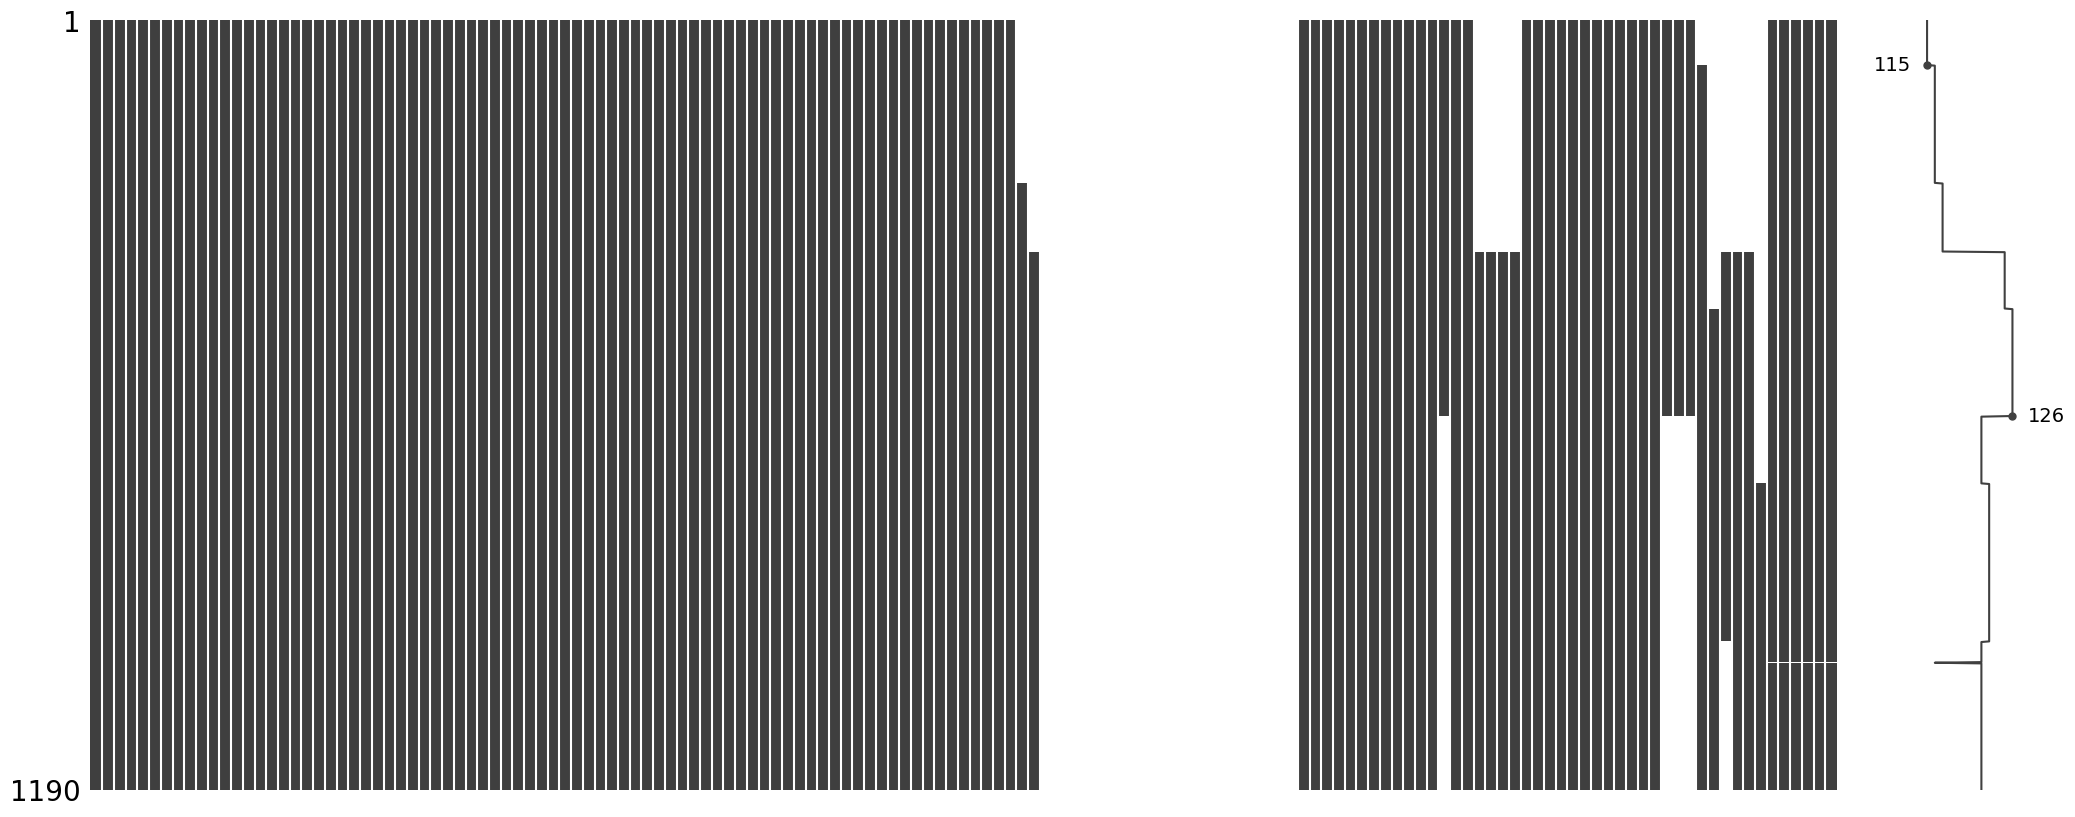

In [19]:
import missingno as msno
import matplotlib.pyplot as plt

msno.matrix(df_final)
plt.show()

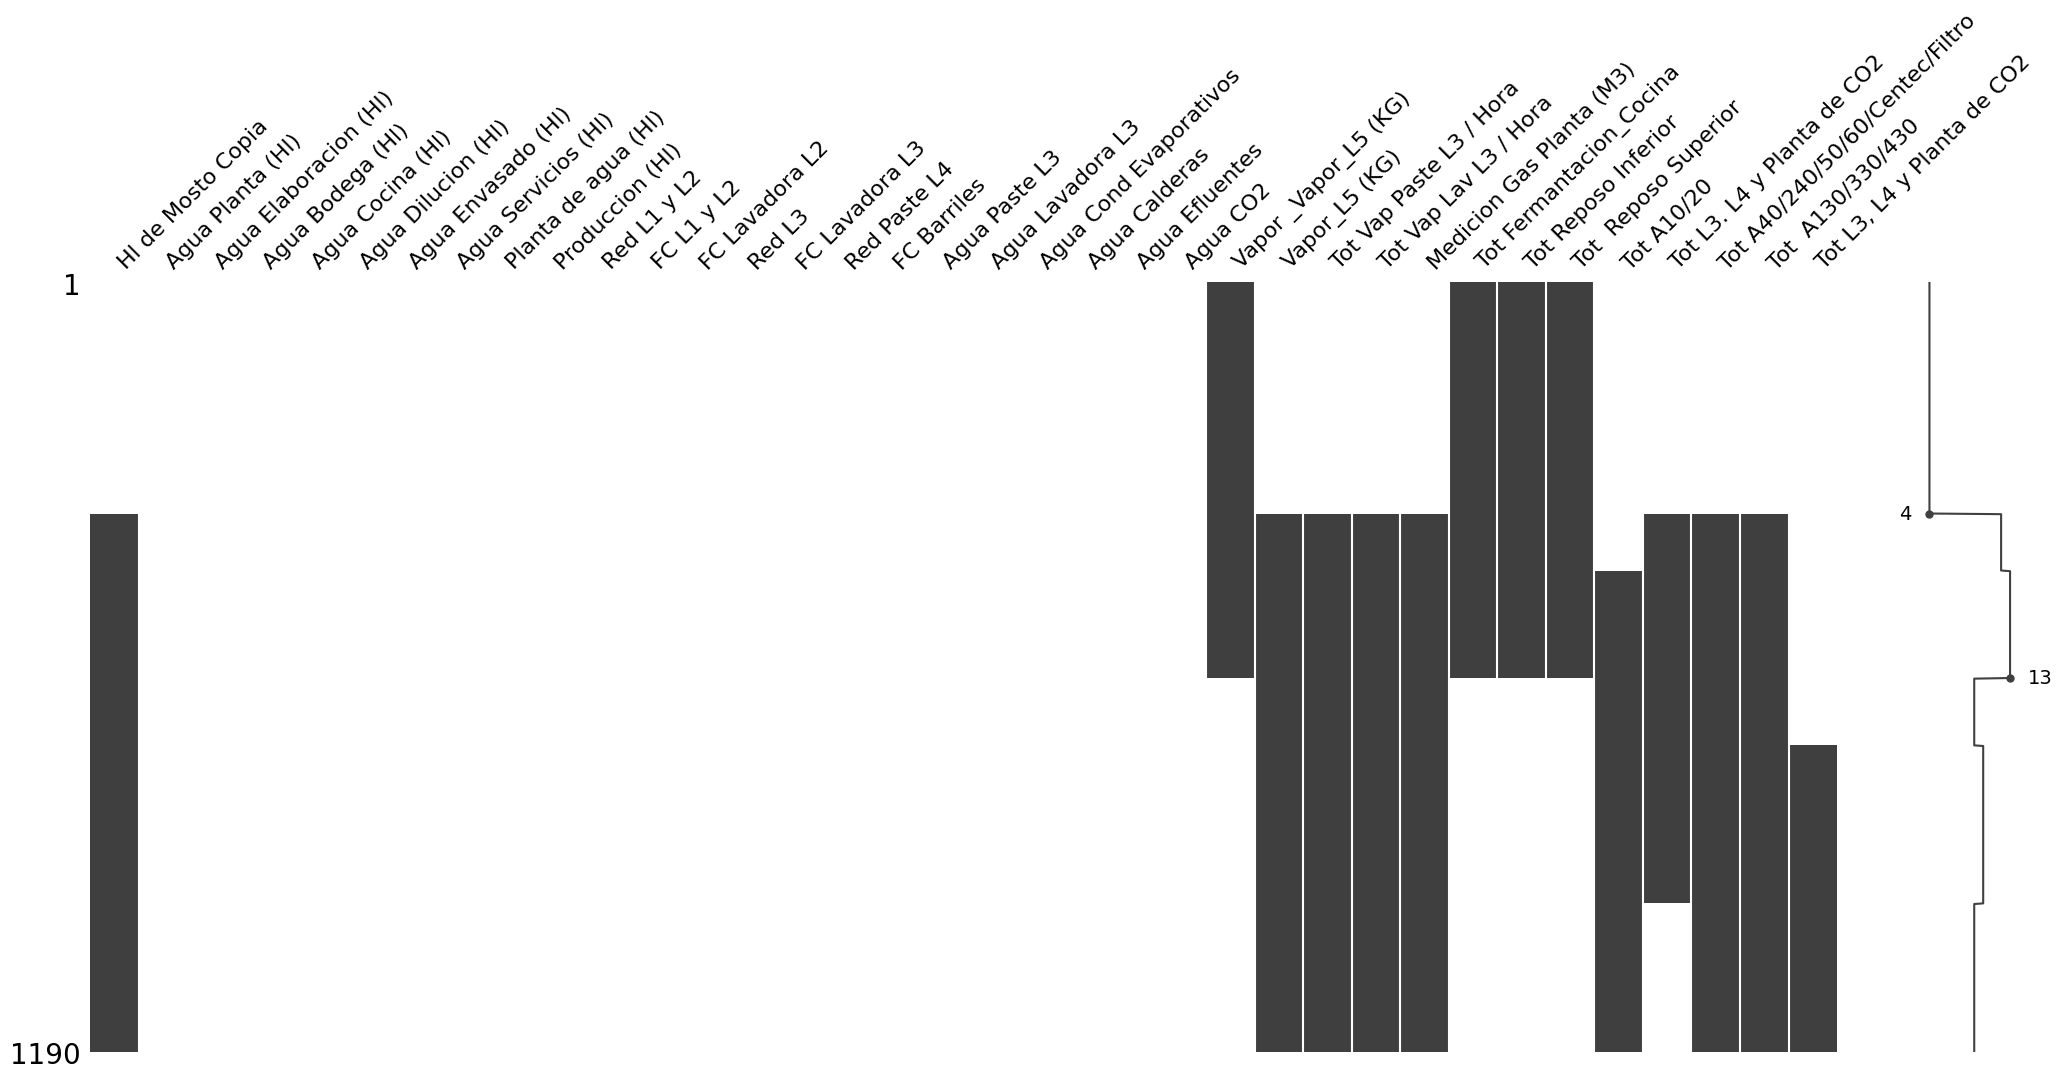

In [20]:
# Zoom a las variables con más del 30% de datos faltantes

msno.matrix(
    df_final.loc[:, df_final.isnull().mean() > 0.3]
)
plt.show()

### Detección de valores atípicos y errores (#VALUE!, #DIV/0!, etc.)

In [21]:
# Cuantificar cantidad de valores atípicos por columna usando el método del IQR

outliers_summary = {}
for column in df_final.select_dtypes(include=['number']).columns:
    Q1 = df_final[column].quantile(0.25)
    Q3 = df_final[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df_final[(df_final[column] < lower_bound) | (df_final[column] > upper_bound)]
    outliers_summary[column] = {
        'num_outliers': outliers.shape[0],
        'percentage_outliers': (outliers.shape[0] / df_final.shape[0]) * 100
    }

outliers_df = pd.DataFrame(outliers_summary).T
outliers_df = outliers_df.sort_values(by='percentage_outliers', ascending=False)

display(outliers_df.round(2))

,num_outliers,percentage_outliers
Totalizador_L2_Barriles,282.0,23.70
VAPOR DE LINEA 4 KG,229.0,19.24
Totaliador_Aire_L4,222.0,18.66
KW Filtr Carbon,200.0,16.81
Linea 4 (Kw),188.0,15.80
...,...,...
Totalizador_Aire_L5,0.0,0.00
Tot A10/20,0.0,0.00
Tot Reposo Inferior,0.0,0.00
Totaliador_Latas,0.0,0.00


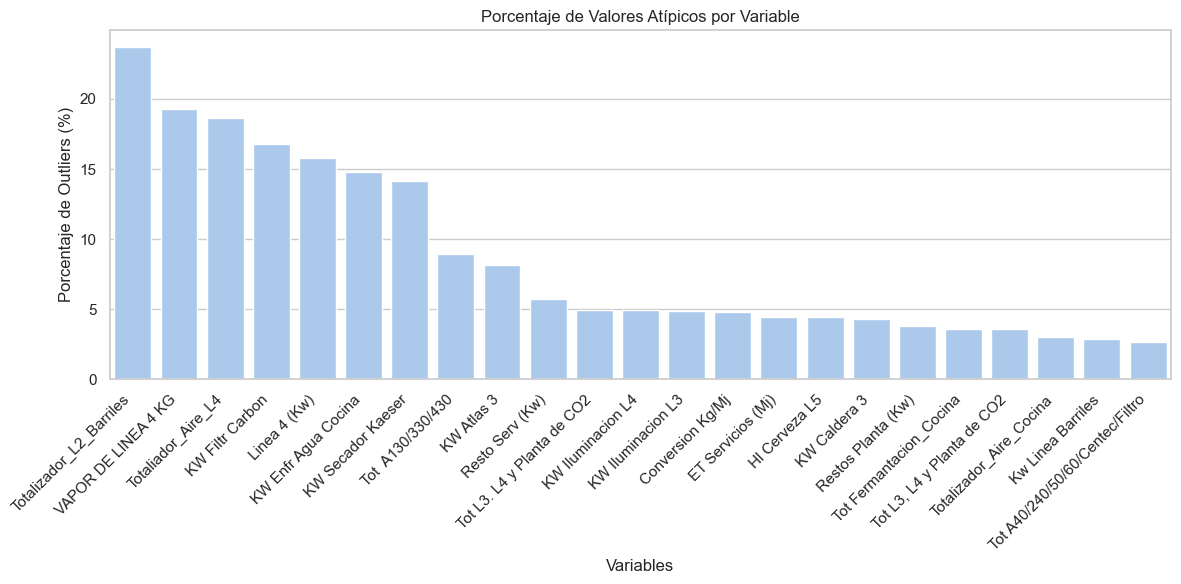

In [22]:
# Mostrar el resumen de outliers en un gráfico de barras

import seaborn as sns
sns.set_theme('notebook', 'whitegrid', palette='pastel')

plt.figure(figsize=(12, 6))
outliers_df = outliers_df[outliers_df['num_outliers'] > 30]     # Filtrar solo variables con más de 30 outliers
sns.barplot(x=outliers_df.index, y='percentage_outliers', data=outliers_df)
plt.xticks(rotation=45, ha='right')
plt.title('Porcentaje de Valores Atípicos por Variable')
plt.ylabel('Porcentaje de Outliers (%)')
plt.xlabel('Variables')
plt.tight_layout()
plt.show()

---